Consider the file provided with the assignment, explore the data, drop the columns that you consider useless for the clustering and find the best clustering
scheme considering only the relevant columns.
The solution must be produced as a Python Notebook, assuming that the dataset is in the same folder as the notebook.
You can use only the computers of the lab, you cannot use any other device, you cannot use email or any other messaging tool. You can use only the websites
accessible through the computers of the lab.
The notebook must operate as follows:


1. Load the data file and explore the data, showing size, data descriptions,
data distributions with boxplot, pairplots . . . . . . . . . . . . . . . . . . . . . . . . 1pt


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

rand = 41

In [19]:
df = pd.read_csv("dataset.csv", sep="\t")

print("Shape:", df.shape)
print("Null rows:", df.shape[0] - df.dropna().shape[0])
print("Duplicated rows:", df.shape[0] - df.drop_duplicates().shape[0])
print()
display(df.info())
display(df.describe())
display(df.head(5))

Shape: (2111, 17)
Null rows: 0
Duplicated rows: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2111 non-null   int64  
 1   Gender                          2111 non-null   object 
 2   Age                             2111 non-null   float64
 3   Height                          2111 non-null   float64
 4   Weight                          2111 non-null   float64
 5   family_history_with_overweight  2111 non-null   object 
 6   FAVC                            2111 non-null   object 
 7   FCVC                            2111 non-null   float64
 8   NCP                             2111 non-null   float64
 9   CAEC                            2111 non-null   object 
 10  SMOKE                           2111 non-null   object 
 11  CH2O                            2111 non-nul

None

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.00000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,1055.00000,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,609.53753,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,527.50000,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,1055.00000,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,1582.50000,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,2110.00000,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


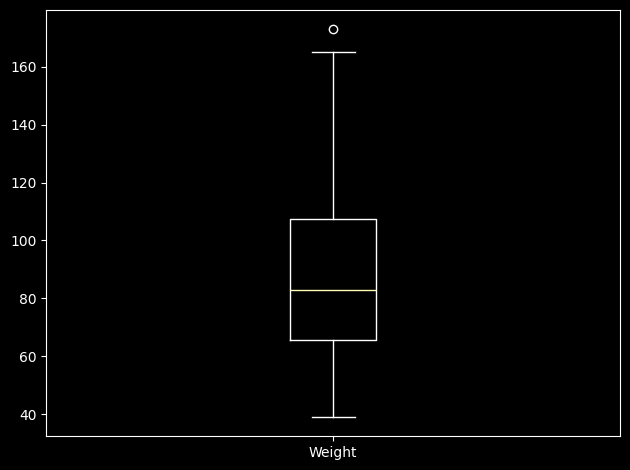

In [20]:
# Boxplot of only weight
df_plot = df.select_dtypes("number").drop("id", axis=1)
plt.boxplot(df_plot[["Weight"]], labels=["Weight"])
plt.tight_layout()
plt.show()

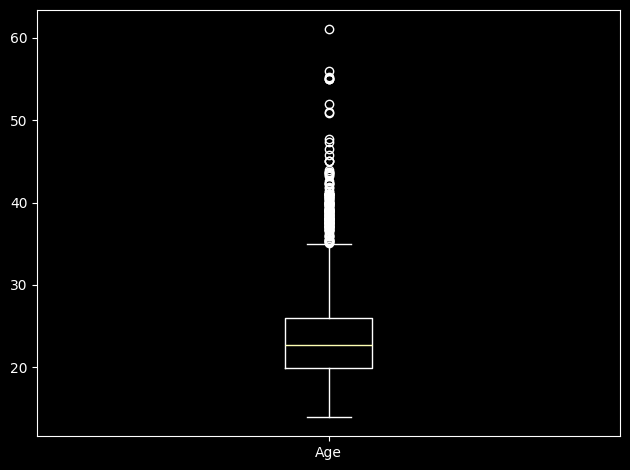

In [21]:
# Boxplot of only Age
plt.boxplot(df_plot[["Age"]], labels=["Age"])
plt.tight_layout()
plt.show()

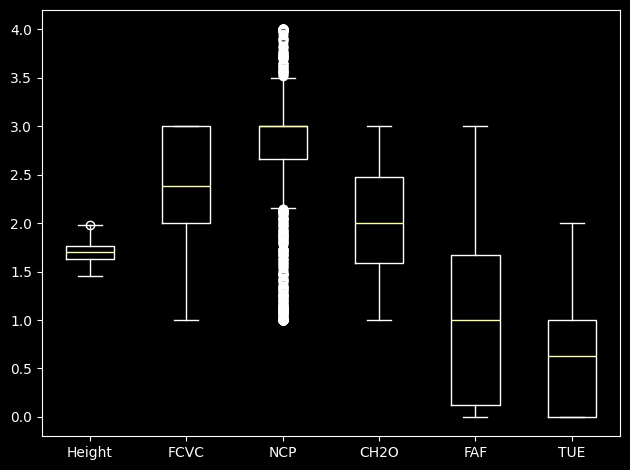

In [22]:
# Boxplot of everithing else
df_plot.drop(["Weight", "Age"], axis=1, inplace=True)
plt.boxplot(df_plot, labels=df_plot.columns)
plt.tight_layout()
plt.show()

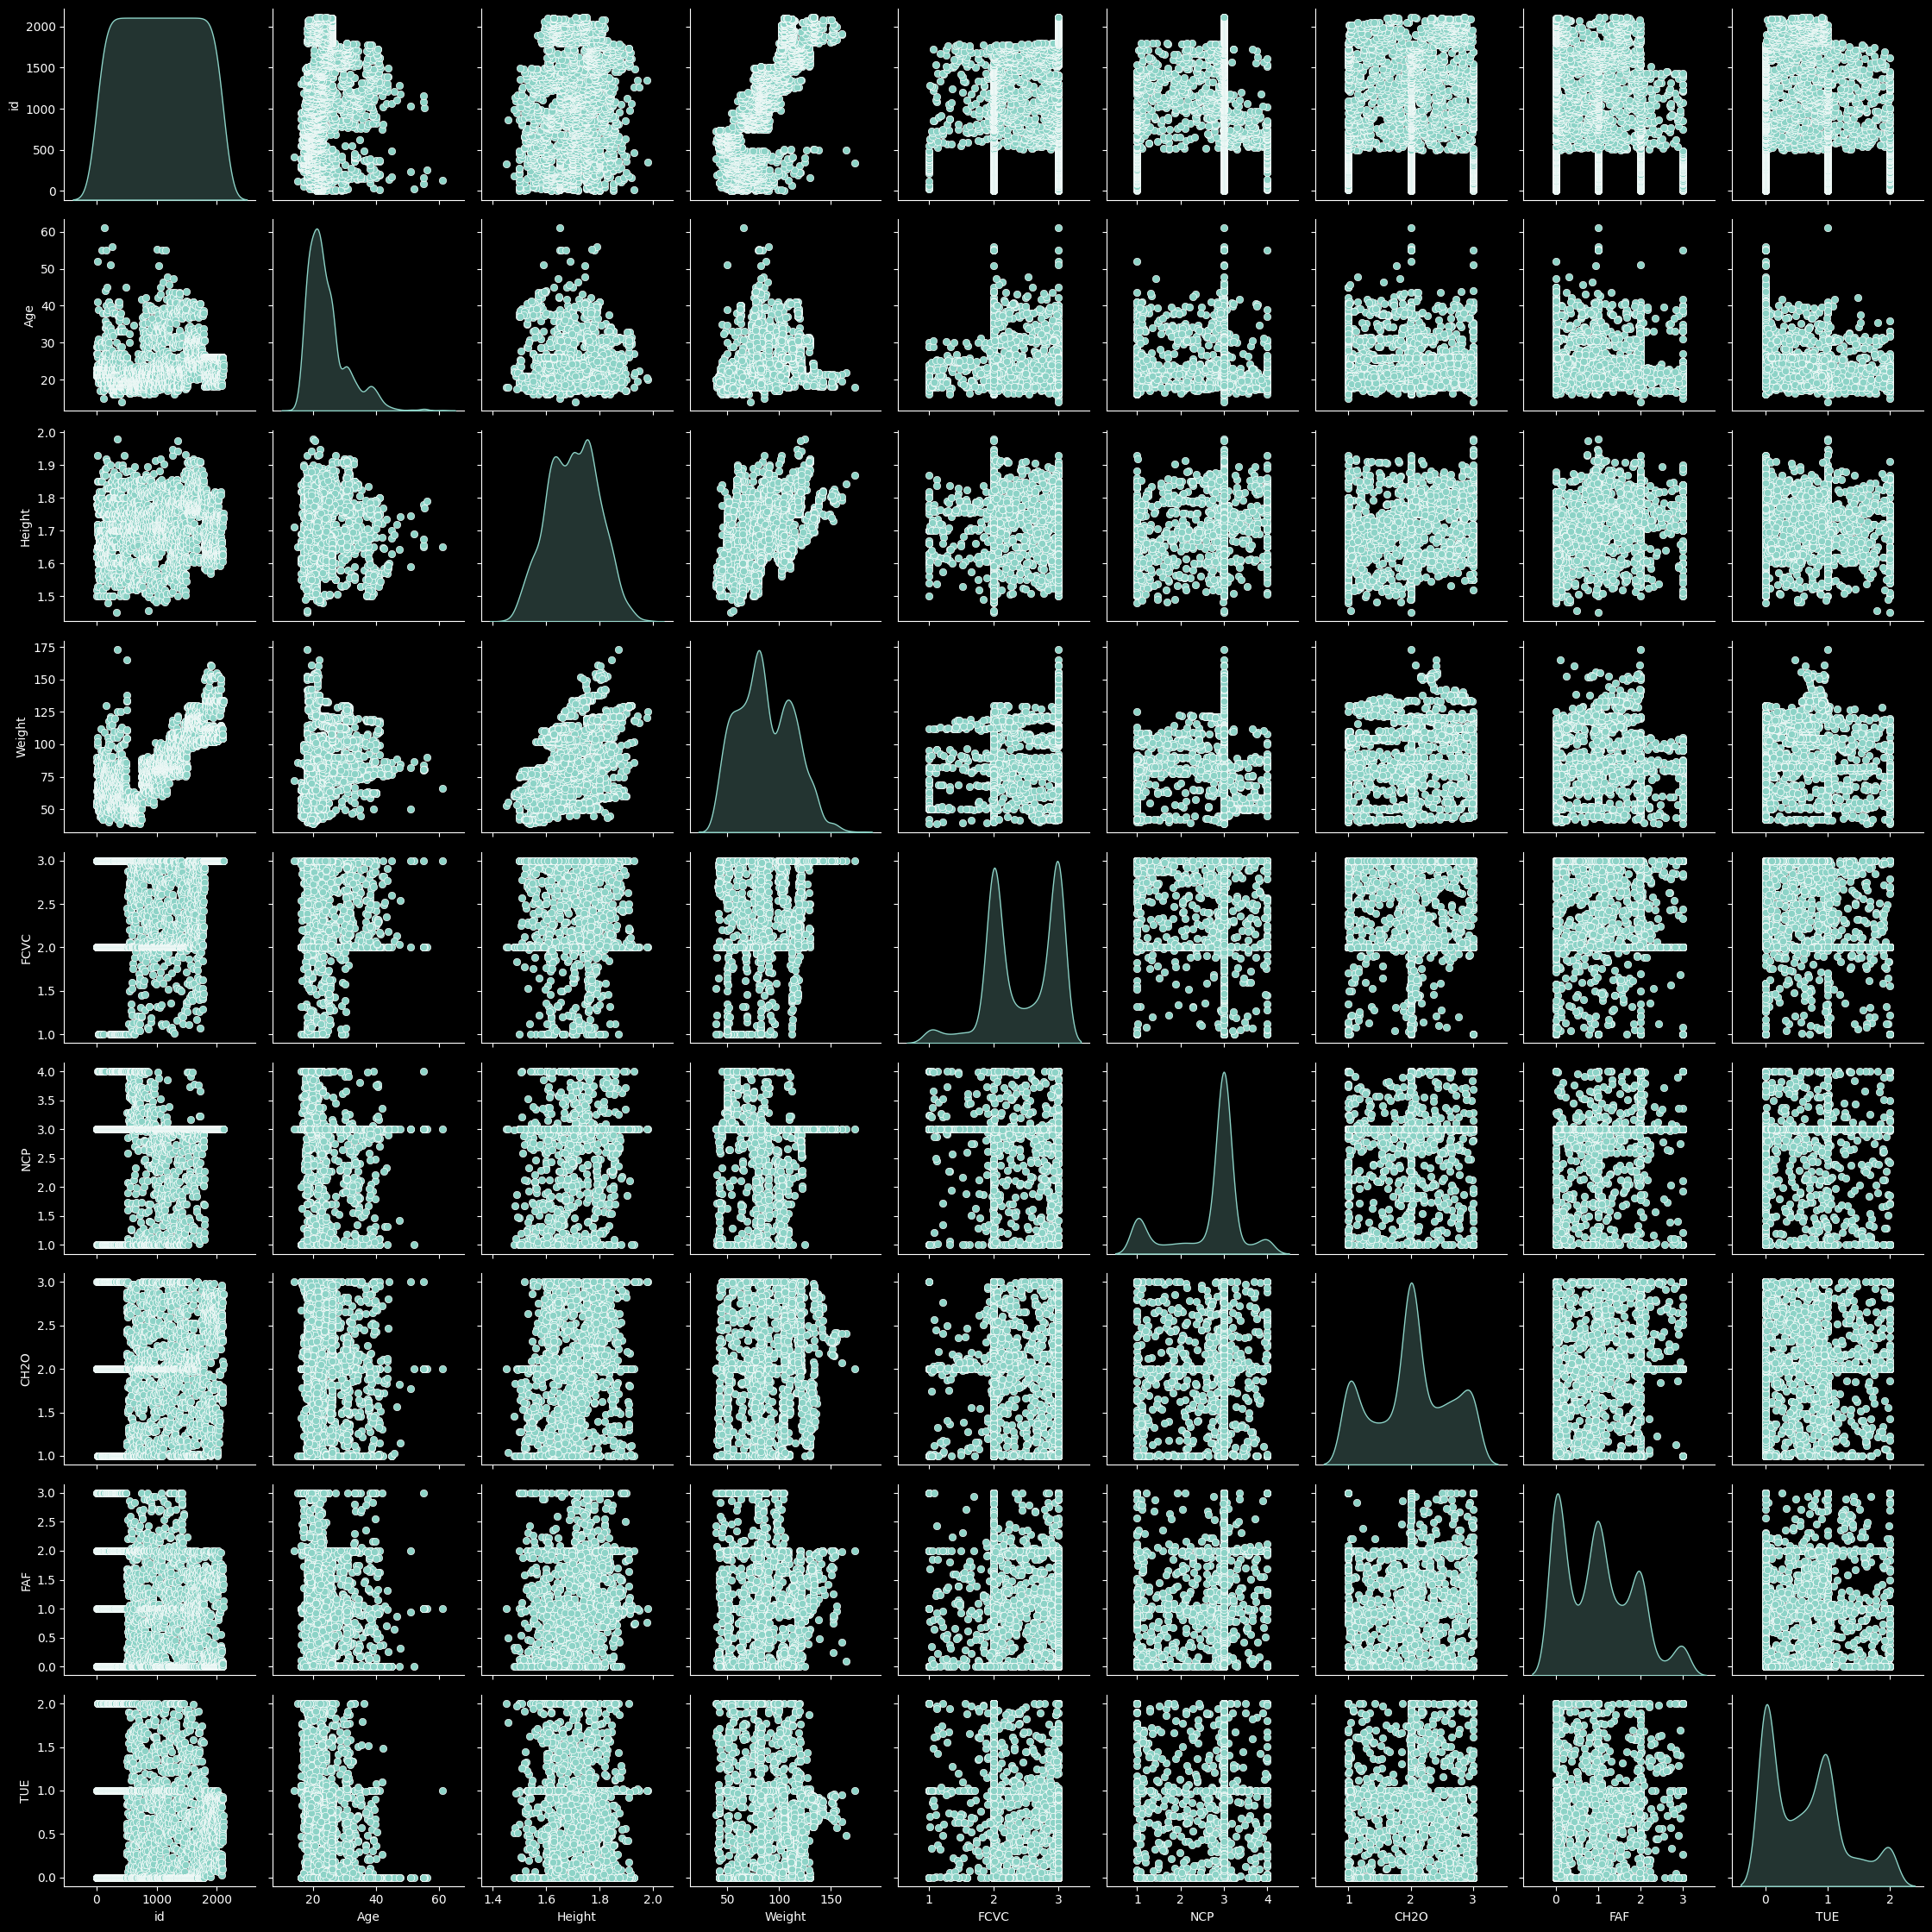

In [23]:
# Pairplot
sns.pairplot(df, diag_kind="kde")
plt.tight_layout()
plt.show()

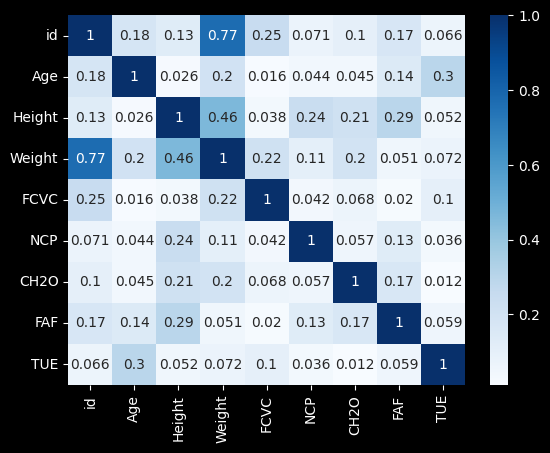

In [24]:
# Correlation of only numerical data
sns.heatmap(df.select_dtypes("number").corr().abs(), annot=True, cmap="Blues")
plt.show()

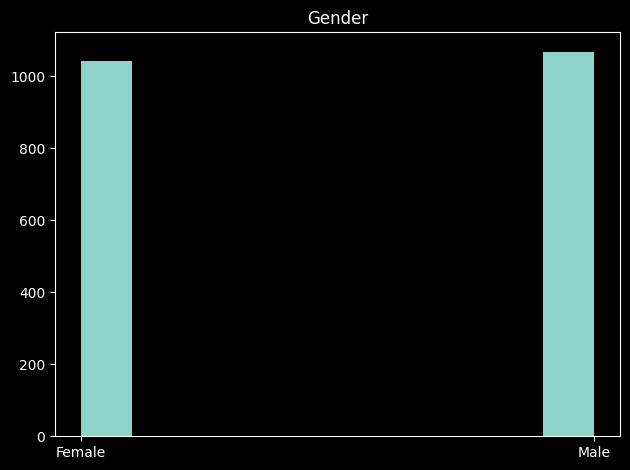

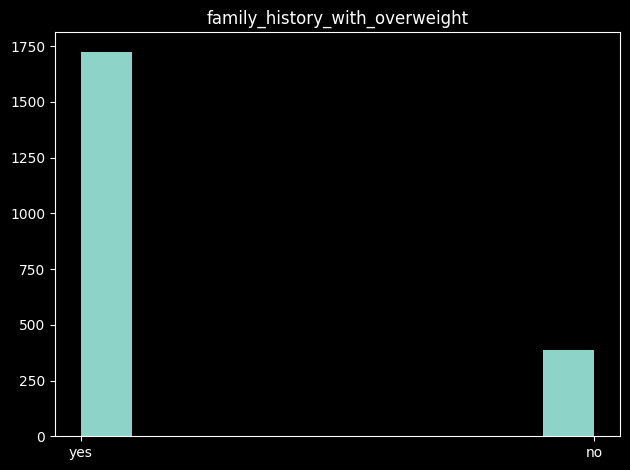

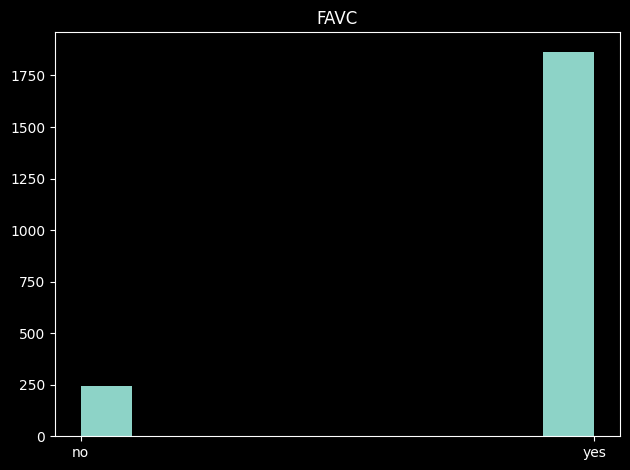

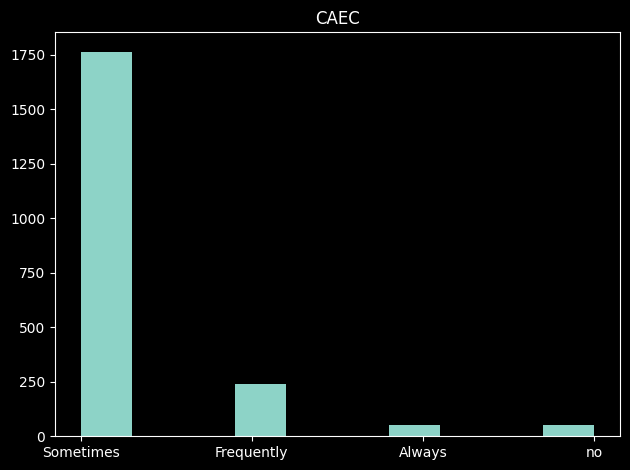

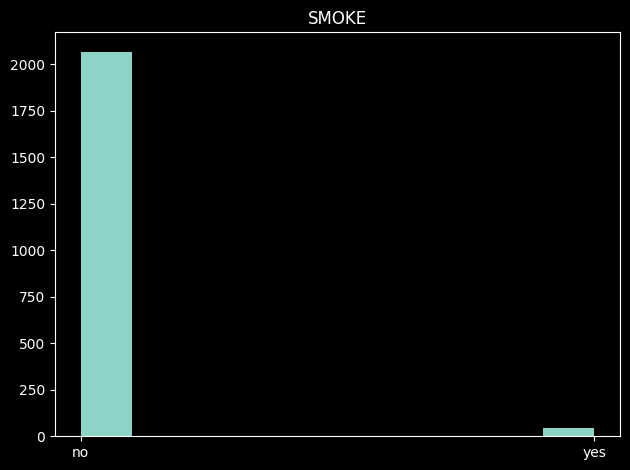

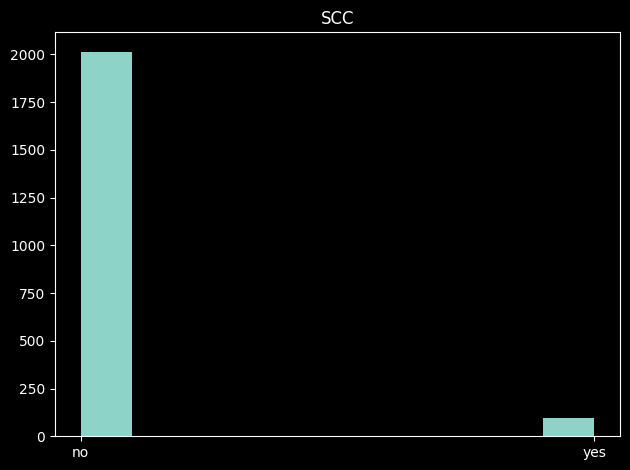

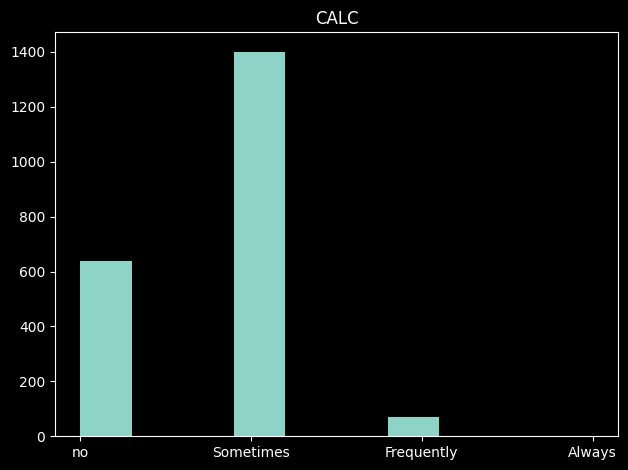

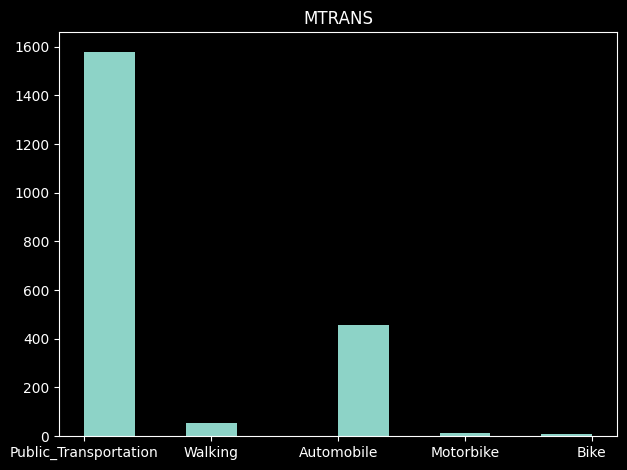

In [25]:
for col in df.select_dtypes("object"):
    plt.title(col)
    plt.hist(df[col], label=df[col].values)
    plt.tight_layout()
    plt.show()

2. Comment the exploration of step 1 pointing out if there are imbalanced
distributions, outliers, missing values, features that seem not to be relevant for clustering . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 1pt


In [26]:
# There are no null or duplicated values
# "id" column is a index-like feature, therefore not useful for clustering
# All the other numerical columns are very low correlated
# There are many outiliers only on the features "Age" and "NCP"
# "Age" is mostly concentrated on lower values: it follows aproximately a normal distribution skewed to the left
# "Height" and "Weight" follow aproximately a normal distribution. The others do not follow a particolar distribution because for each one there are some values much higher among others
# Mostly of the ordinal features are umbalanced: the only perfectly balanced is "Gender"

3. Drop the columns that are not relevant for the clustering operation, if
any, and explain why you do that.
Deal with missing values, if any.
Transform the fields with type "object" and only two distinct values
into ‘0/1‘ with OrdinalEncoder
Transform the other "object" fields with OneHotEncoder
Transform the numeric fields with MinMaxScaler . . . . . . . . . . . . . . . . .6pt


In [27]:
# drop "id" because it's an index
df.drop("id", axis=1, inplace=True)
df.head(3)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation


In [28]:
# MinMax the numerical values
from sklearn.preprocessing import MinMaxScaler

col_selected_numerical = []
for col in df.select_dtypes("number"):
    col_selected_numerical.append(col)
print(col_selected_numerical)
df[col_selected_numerical] = MinMaxScaler().fit_transform(df[col_selected_numerical])
df.head(3)

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,0.148936,0.320755,0.186567,yes,no,0.5,0.666667,Sometimes,no,0.5,no,0.000000,0.5,no,Public_Transportation
1,Female,0.148936,0.132075,0.126866,yes,no,1.0,0.666667,Sometimes,yes,1.0,yes,1.000000,0.0,Sometimes,Public_Transportation
2,Male,0.191489,0.660377,0.283582,yes,no,0.5,0.666667,Sometimes,no,0.5,no,0.666667,0.5,Frequently,Public_Transportation


In [29]:
# OrdinalEncoder for columns with only 2 distinct values
from sklearn.preprocessing import OrdinalEncoder

col_selected = []
for col in df.select_dtypes("object"):
    if df[col].value_counts().size == 2:
        col_selected.append(col)
print(col_selected)
df[col_selected] = OrdinalEncoder().fit_transform(df[col_selected])
df.head(3)

['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0.0,0.148936,0.320755,0.186567,1.0,0.0,0.5,0.666667,Sometimes,0.0,0.5,0.0,0.000000,0.5,no,Public_Transportation
1,0.0,0.148936,0.132075,0.126866,1.0,0.0,1.0,0.666667,Sometimes,1.0,1.0,1.0,1.000000,0.0,Sometimes,Public_Transportation
2,1.0,0.191489,0.660377,0.283582,1.0,0.0,0.5,0.666667,Sometimes,0.0,0.5,0.0,0.666667,0.5,Frequently,Public_Transportation


In [30]:
# OneHotEncoder for the others
df = pd.get_dummies(df, dtype=int)
df.head(3)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.0,0.148936,0.320755,0.186567,1.0,0.0,0.5,0.666667,0.0,0.5,...,0,0,0,0,1,0,0,0,1,0
1,0.0,0.148936,0.132075,0.126866,1.0,0.0,1.0,0.666667,1.0,1.0,...,0,0,0,1,0,0,0,0,1,0
2,1.0,0.191489,0.660377,0.283582,1.0,0.0,0.5,0.666667,0.0,0.5,...,0,0,1,0,0,0,0,0,1,0


4. find the best clustering scheme with KMeans, show the silhouette plots
of clusters, show the distribution of the resulting cluster labels (e.g.
histogram or pie plot) . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 4pt


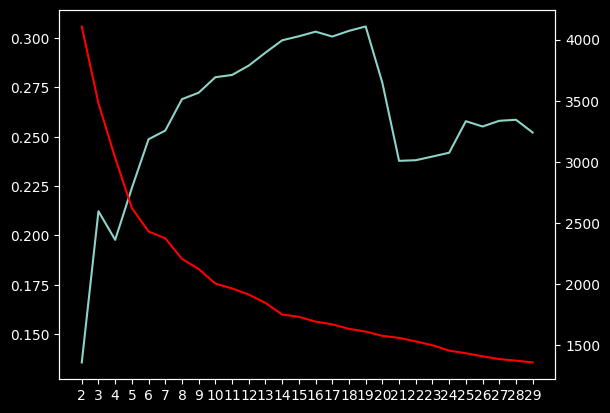

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from plot_silhouette_w_mean import plot_silhouette

cluster_range = range(2, 30, 1)
sil_scores = []
labels = []
inertia = []
for n_cluster in cluster_range:
    k_means = KMeans(n_init="auto", n_clusters=n_cluster, random_state=rand)
    k_means.fit(df)
    sil_scores.append(silhouette_score(df, k_means.labels_))
    labels.append(k_means.labels_)
    inertia.append(k_means.inertia_)

plt.plot(cluster_range, sil_scores)
ax2 = plt.twinx()
ax2.plot(cluster_range, inertia, color="red")
plt.xticks(cluster_range)
plt.show()

5. find the best clustering scheme with Agglomerative Clustering or DBSCAN (your choice) show the silhouette plots of clusters, show the distribution of the resulting cluster labels (e.g. histogram or pie plot) 2pt


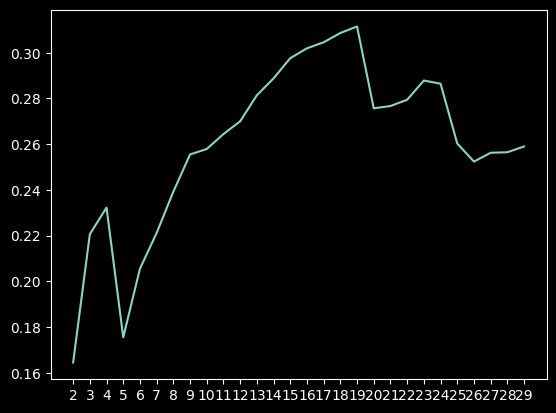

In [32]:
from sklearn.cluster import AgglomerativeClustering

cluster_range = range(2, 30, 1)
sil_scores = []
sil_samples = []
labels = []
for n_cluster in cluster_range:
    agg = AgglomerativeClustering(n_clusters=n_cluster)
    agg.fit(df)
    sil_scores.append(silhouette_score(df, agg.labels_))
    labels.append(agg.labels_)

plt.plot(cluster_range, sil_scores)
plt.xticks(cluster_range)
plt.show()

6. Compare the similarities of the two schemes with the
adjusted_rand_score and comment the results . . . . . . . . . . . . . . . . . .2pt

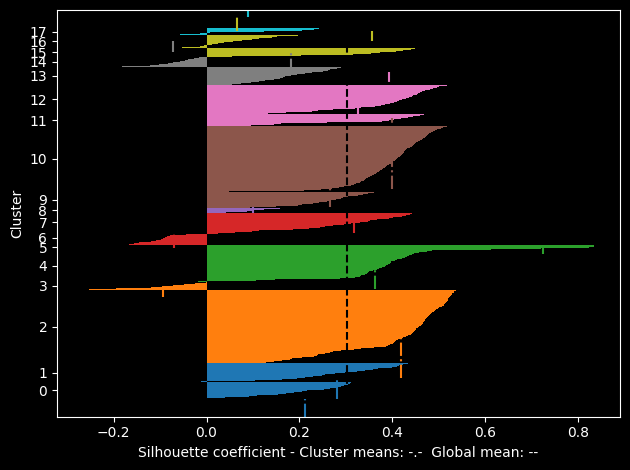

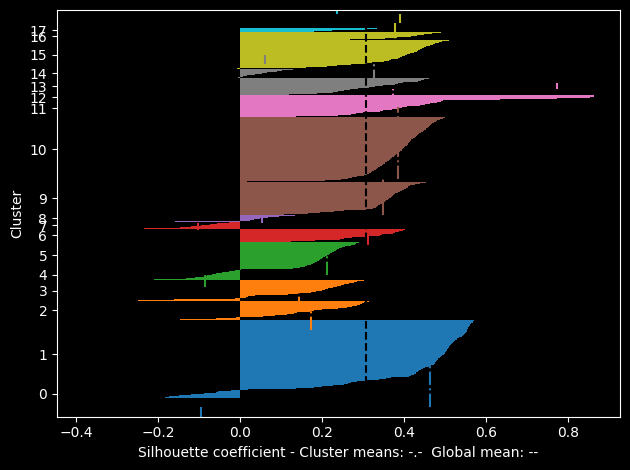

Adjusted Rand Score:  0.8858901962324245


In [33]:
from sklearn.metrics import adjusted_rand_score


n_cluster = 18

k_means = KMeans(n_init="auto", n_clusters=n_cluster, random_state=rand)
k_means.fit(df)

plot_silhouette(silhouette_samples(df, k_means.labels_), k_means.labels_)

agg = AgglomerativeClustering(n_clusters=n_cluster)
agg.fit(df)

plot_silhouette(silhouette_samples(df, agg.labels_), agg.labels_)

print("Adjusted Rand Score: ", adjusted_rand_score(k_means.labels_, agg.labels_))

# The two models gives approximately the same informations. The clusters are many and gives good results with 18 clusters